In [1]:
import time, os, sys
os.environ['OMP_NUM_THREADS']="1"
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['OMP_NUM_THREADS']='1'
os.environ['MKL_NUM_THREADS']='1'

In [3]:
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
import glob

/home/cbmr/ldr139/.conda/envs/cellpose/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dapi_dir = '/projects/ldr139/spatial_data/output0/*.tif'

In [5]:
images = glob.glob(dapi_dir)
# Looping through list to find "Brain" index and retrieving 6th to 11th string from there which should be brain A-H underscore 1-6 + A/B/AB
# Looping through list to find "Brain" index and retrieving 12th to the 4th last string which should be the channel name
section = []
for b in range(len(images)):
    section.append((images[b][(images[b].find("Brain") + 6):(images[b].find("Brain") + 11)]).rstrip("_"))
mice = list(dict.fromkeys(section))

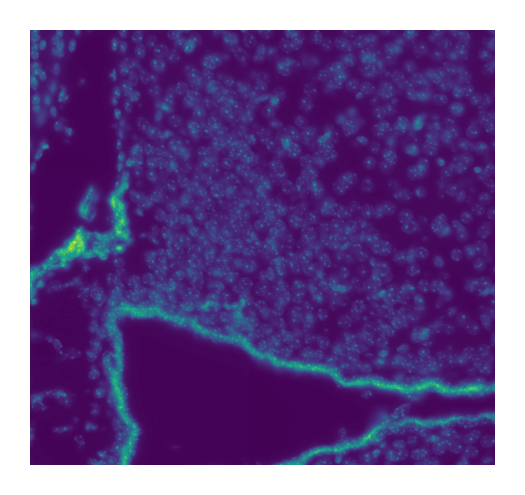

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(io.imread(images[0]))
plt.axis('off')
plt.show()

In [7]:
img_dict = {}
for image in images:
    for sect in mice:
        if sect in image:
            img_dict[sect] = image

In [19]:
from cellpose import models, io
model = models.Cellpose(gpu=True, model_type='cyto2')
channels = [[0,0]]

import time
start_time = time.time()

for section in img_dict.keys():
    print(section)
    img = io.imread(img_dict[section])
    masks, flows, styles, diams = model.eval(img, diameter=70, channels=channels)
    io.masks_flows_to_seg(img, masks, flows, diams, 'dapi_segs/'+section+'_DAPI', channels)
    io.save_to_png(img, masks, flows, 'dapi_segs/'+section+'_DAPI')
    print("--- %s seconds ---" % (time.time() - start_time))

B_2A
--- 38.80872702598572 seconds ---
C_5B
--- 48.730916261672974 seconds ---
F_5B(
--- 58.41539549827576 seconds ---
G_7A
--- 94.67165231704712 seconds ---
A_1AB
--- 154.1805920600891 seconds ---
G_1A
--- 161.1084508895874 seconds ---
D_1A
--- 187.00145554542542 seconds ---
F_1B
--- 215.0278992652893 seconds ---
D_3A
--- 258.6762797832489 seconds ---
A_3B
--- 283.5856158733368 seconds ---
C_4A
--- 293.6352822780609 seconds ---
E_2B
--- 313.7846693992615 seconds ---
G_2A
--- 328.91620349884033 seconds ---
B_6A
--- 336.554354429245 seconds ---
D_5A
--- 350.8997902870178 seconds ---
C_5A
--- 355.5112633705139 seconds ---
B_3B
--- 362.5736622810364 seconds ---
A_4B
--- 381.16770672798157 seconds ---
A_5B
--- 405.76591205596924 seconds ---
F_6AB
--- 421.74008774757385 seconds ---
F_2A
--- 458.41762590408325 seconds ---
H_5A
--- 495.0455594062805 seconds ---
D_3B
--- 504.34692573547363 seconds ---
C_3B
--- 526.9167232513428 seconds ---
B_6B
--- 547.9968838691711 seconds ---
G_3B
--- 588.41

In [18]:
!pwd

/raid5/home/cbmr/ldr139


In [53]:
mask_dir = {}
mask_arrays = glob.glob("dapi_segs/*.npy")
for sect in mice:
    if "dapi_segs/"+sect+"_DAPI_seg.npy" in mask_arrays:
        mask_dir[sect]=np.load("dapi_segs/"+sect+"_DAPI_seg.npy", allow_pickle=True).item()["masks"]

In [59]:
for key in mask_dir.keys():
    print(key, mask_dir[key].shape, mask_dir[key].max())

B_2A (3415, 3650) 679
C_5B (2313, 1921) 315
F_5B( (2318, 1921) 299
G_7A (3408, 3652) 567
A_1AB (3407, 3648) 1224
G_1A (2315, 1920) 151
D_1A (2317, 3653) 587
F_1B (2312, 3647) 635
D_3A (3415, 3653) 707
A_3B (2308, 3646) 499
C_4A (1217, 3649) 364
E_2B (2311, 3653) 509
G_2A (2313, 3646) 317
B_6A (2315, 1920) 231
D_5A (2313, 3654) 306
C_5A (1216, 1920) 232
B_3B (2306, 1920) 254
A_4B (2306, 3651) 475
A_5B (2307, 3643) 648
F_6AB (2312, 3645) 364
F_2A (3405, 3648) 792
H_5A (3407, 3645) 708
D_3B (1217, 3650) 313
C_3B (2312, 3651) 587
B_6B (2316, 3649) 440
G_3B (3411, 3649) 810
A_2AB (3399, 3658) 751
G_2B (3407, 3647) 884
B_3A (2308, 3645) 543
H_2A (3406, 3644) 928
E_4B (2309, 3648) 283
B_4B (2313, 1920) 363
F_2B (2313, 3645) 302
H_5B (2316, 3642) 549
D_4A (3413, 3646) 597
E_5A (2314, 3652) 441
G_3A (2310, 3644) 673
E_5B (2306, 1920) 148
B_5B (2310, 3652) 440
H_1A (3399, 3650) 871
H_4B (2305, 3652) 613
G_5A (2310, 3643) 434
C_3A (2307, 3647) 529
B_2B (2312, 1921) 302
A_6B (2311, 3659) 556
A_7AB

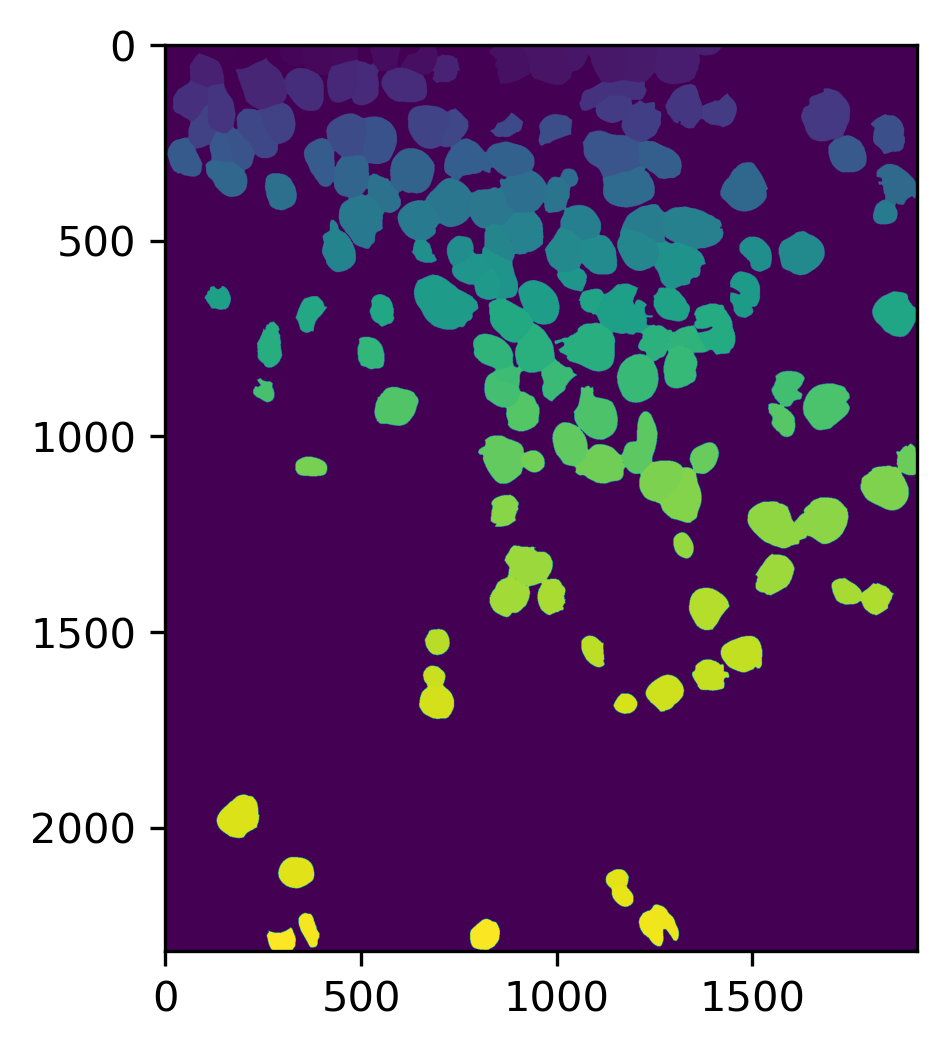

In [66]:
plt.imshow(np.load("dapi_segs/G_1A_DAPI_seg.npy", allow_pickle=True).item()['masks'])

In [1]:
!pwd

/raid5/home/cbmr/ldr139


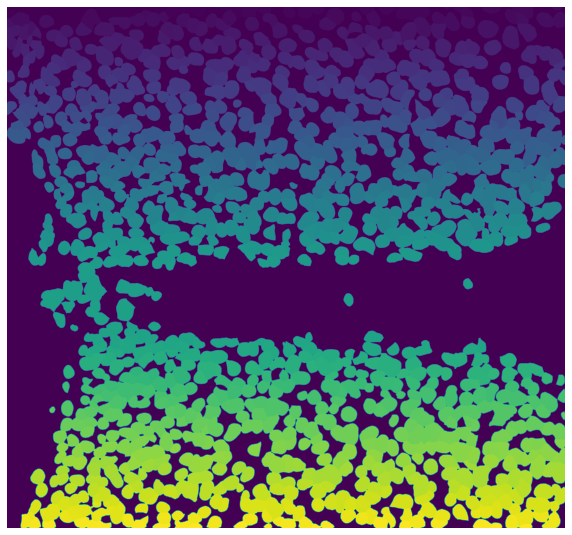

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(np.load("dapi_segs/A_1AB_DAPI_seg.npy", allow_pickle=True).item()['masks'])
ax.axis('off')

plt.show()

In [1]:
!pwd

/raid5/home/cbmr/ldr139/RNAscope_proj
